# Making Maps (Mapping Tools)

[GeoPandas > Docs > User Guide > Making Maps](http://geopandas.org/mapping.html#)

<br>

*geopandas* provides a high-level interface to the `matplotlib` library for making maps. Mapping shapes is as easy as using the `plot()` method on a `GeoSeries` or `GeoDataFrame`.

Loading some example data:

In [1]:
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

We can now plot those GeoDataFrames:

In [2]:
# Examine country GeoDataFrame
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [3]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


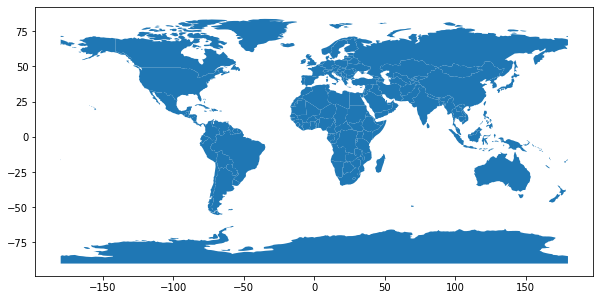

In [4]:
# Basic plot, random colors
world.plot(figsize=(10,5))

plt.show()

Note that in general, any options one can pass to pyplot in `matplotlib` (or style options that work for lines) can be passed to the `plot()` method.

<br>

## 4.1 Choropleth Maps

cf) Choropleth Maps

- 지도에 표시되는 통계 변수의 측정에 비례하여 영역이 음영 처리되거나 패턴 화 된 주제별지도
- ex) 인구 밀도 또는 1 인당 소득. 
- Choropleth 맵은 측정 값이 지리적 영역에 따라 어떻게 달라지는지를 시각화하는 쉬운 방법을 제공하거나 한 지역 내의 변동 수준을 보여줌

*geopandas* makes it easy to create Choropleth maps (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the `column` argument set to the column whose values you want used to assign colors.

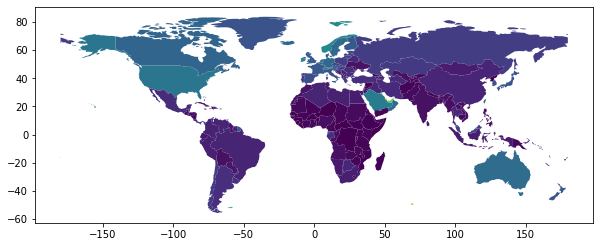

In [5]:
# Plot by GDP per capta
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap', figsize=(10,5))

plt.show()

<br>

### 4.1.1 Creating a legend

When plotting a map, one can enable a legend using the `legend` argument:

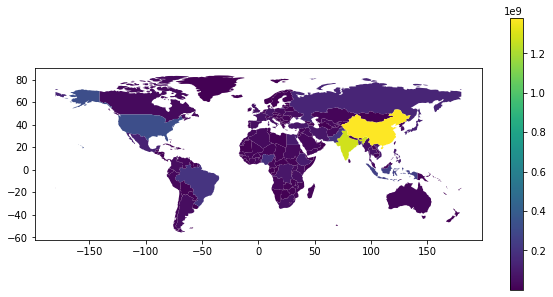

In [6]:
# Plot population estimates with an accurate legend

fig, ax = plt.subplots(1, 1, figsize=(10,5))

world.plot(column='pop_est', ax=ax, legend=True)

plt.show()

However, the default appearance of the legend and plot axes may not be desirable. One can define the plot axes (with `ax`) and the legend axes (with `cax`) and then pass those in to the `plot` call. The following example uses `mpl_toolkits` to vertically align the plot axes and the legend axes:

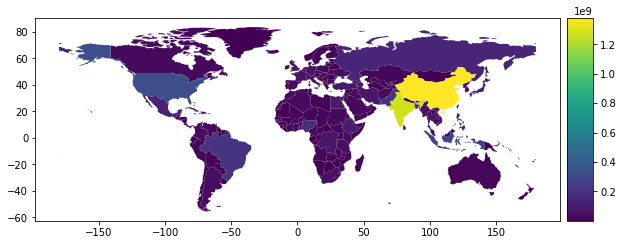

In [7]:
# Plot population estimates with an accurate legend
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(10,5))

divider = make_axes_locatable(ax)

cax = divider.append_axes('right', size='5%', pad=0.1)

world.plot(column='pop_est', ax=ax, legend=True, cax=cax)

plt.show()

And the following example plots the color bar below the map and adds its label using `legend_kwds`:

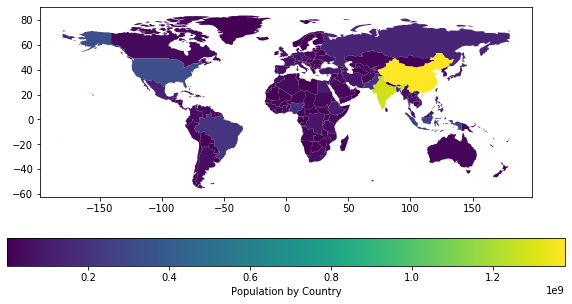

In [8]:
# Plot population estimates with an accurate legend
fig, ax = plt.subplots(1, 1, figsize=(10,5))

world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': 'horizontal'})

plt.show()

<br>

### 4.1.2 Choosing colors

One can also modify the colors used by `plot` with the `cmap` option (for a full list of colormaps, see the [matplotlib website](https://matplotlib.org/tutorials/colors/colormaps.html)):

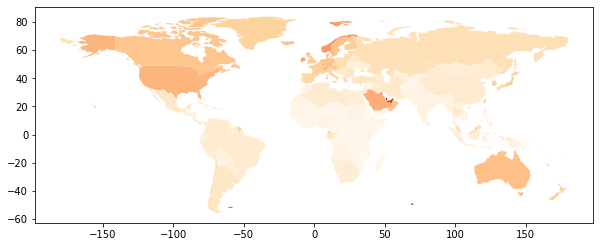

In [9]:
# cmap : OrRd
world.plot(column='gdp_per_cap', cmap='OrRd', figsize=(10,5))
plt.show()

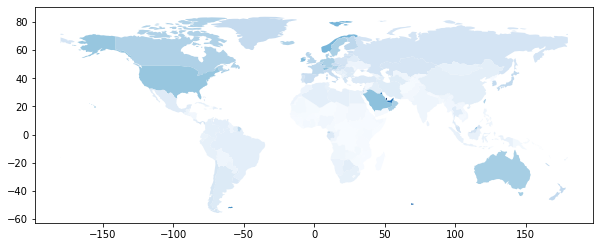

In [10]:
# cmap : Blues
world.plot(column='gdp_per_cap', cmap='Blues', figsize=(10,5))
plt.show()

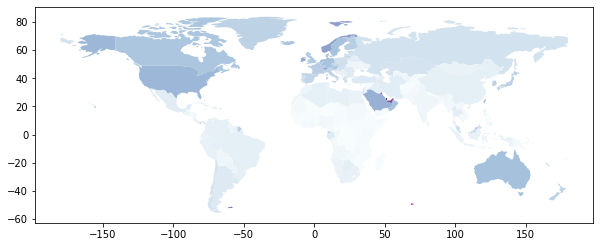

In [11]:
# cmap : BuPu
world.plot(column='gdp_per_cap', cmap='BuPu', figsize=(10,5))
plt.show()

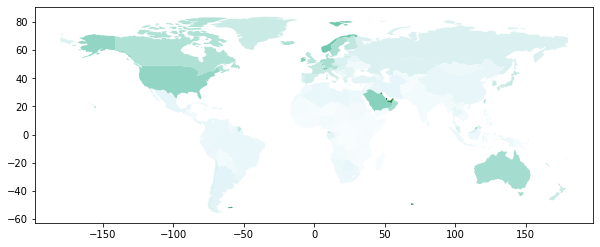

In [12]:
# cmap : BuGn
world.plot(column='gdp_per_cap', cmap='BuGn', figsize=(10,5))
plt.show()

The way color maps are scaled can also be manipulated(조작된) with the `scheme` option  (if you have `mapclassify` installed, which can be accomplished via `conda install -c conda-forge mapclassify`).  
  
  
The `scheme` option can be set to any scheme provided by mapclassify (e.g. ‘box_plot’, ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’, ‘headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’, ‘jenks_caspall_sampled’, ‘max_p_classifier’, ‘maximum_breaks’, ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’ or ‘user_defined’).  
  
  
Arguments can be passed in classification_kwds dict. See the mapclassify documentation for further details about these map classification schemes.

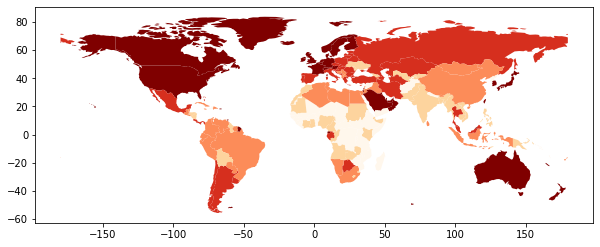

In [14]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles', figsize=(10,5))
plt.show()

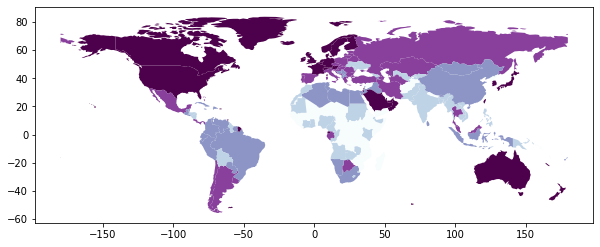

In [15]:
# cmap : BuPu
world.plot(column='gdp_per_cap', cmap='BuPu', scheme='quantiles', figsize=(10,5))
plt.show()

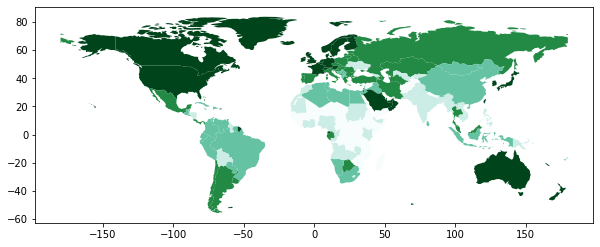

In [16]:
# cmap : BuGn
world.plot(column='gdp_per_cap', cmap='BuGn', scheme='quantiles', figsize=(10,5))
plt.show()

<br>

## 4.2 Maps with Layers

There are two strategies for making a map with multiple layers – one more succinct(간결한), and one that is a little more flexible.

Before combining maps, however, remember to always ensure they share a common CRS (so they will align).

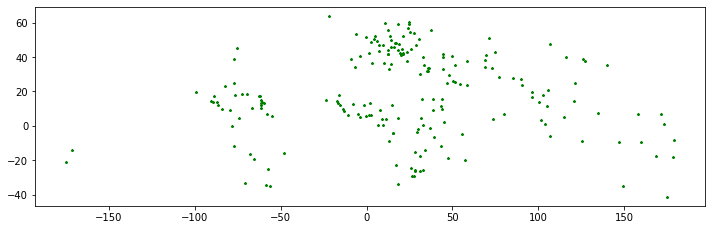

In [23]:
# Look at capitals
# Note use of standard 'pyplot' line style options
cities.plot(figsize=(12,5),
            marker='*',
            color='green',
            markersize=5)

plt.show()

In [22]:
# Check crs
world.crs

{'init': 'epsg:4326'}

In [25]:
cities.crs

{'init': 'epsg:4326'}

In [26]:
cities = cities.to_crs(world.crs)

In [27]:
# Now we can overlay over country outlines
# And yes, there are lots of island capitals
# apparently(~인것처럼 보이는) in the middle of the ocean!

<br>

### 4.2.1 Method 1

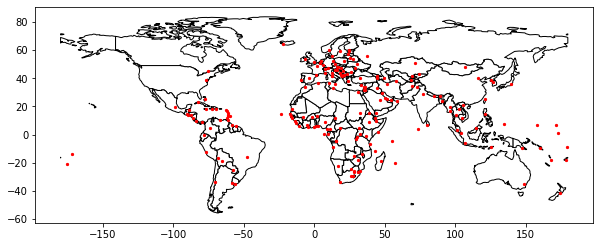

In [36]:
base = world.plot(figsize=(10,5),
                  color='white',
                  edgecolor='black')

cities.plot(ax=base,
            marker='o',
            color='red',
            markersize=5)

plt.show()

<br>

### 4.2.2 Method 2 : Using matplotlib objects

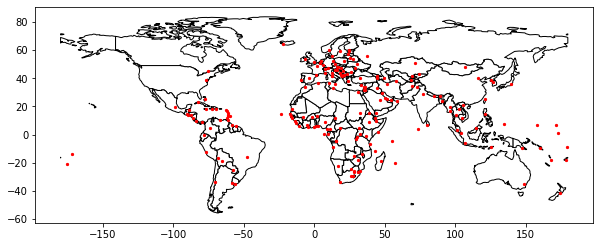

In [43]:
fig, ax = plt.subplots(figsize=(10,5))

# set aspect(측면) to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# woring with pyplot directly.
ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')

cities.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show()